In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,BatchNormalization,Activation,ZeroPadding2D,AveragePooling2D,MaxPooling2D,Add,AveragePooling2D,Flatten,Dense,Input
from keras.utils import to_categorical
from keras.initializers import glorot_uniform,glorot_normal
from keras.optimizers import Adadelta
from keras import backend as k
from keras.engine.input_layer import Input
from random import shuffle
from keras.models import Model, load_model

#Set to mini batch
batch_size = 128
#the number of classes we want to classify 0 --- 9
num_classes =2

DATA_DIR = 'PetImages'

IMAGE_ROWS, IMAGE_COLUMNS = 100,100

input_shape = (IMAGE_ROWS,IMAGE_COLUMNS,1)


Using TensorFlow backend.


In [4]:
#function to read the data
def create_train_data(load_count):
    num_of_test = 1000
    training_data = []
    # to get the labels right
    for cl_type in ['Dog','Cat']:
        label = [0,0]
        if cl_type == 'Dog':
            label = [1 ,0]
        else :
            label = [0 ,1]
        image_path = os.path.join(DATA_DIR,cl_type)
        #the number of items from each class
        num_of_test= load_count
        for img in os.listdir(image_path):
            if num_of_test  == 0 :
                break
            path = os.path.join(image_path,img)
            image =cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if not image is None:
                image_resize = cv2.resize(image,(IMAGE_ROWS, IMAGE_COLUMNS))
                training_data.append([np.array(image_resize).astype('float32')/255,np.array(label)])
                num_of_test = num_of_test - 1
    shuffle(training_data)
    
    return training_data
        
        

In [5]:
data = create_train_data(25000)

In [6]:
train = data[:-5000]
test = data[-5000:]

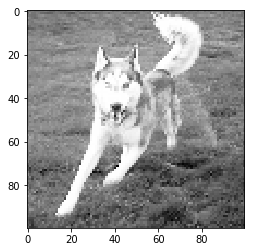

In [10]:
plt.imshow(train[25][0],cmap='Greys_r')

In [11]:
x_train = np.array([i[0] for i in train]).reshape(-1,IMAGE_ROWS,IMAGE_COLUMNS,1)
y_train = np.array([i[1] for i in train])

x_test = np.array([i[0] for i in test]).reshape(-1,IMAGE_ROWS,IMAGE_COLUMNS,1)
y_test = np.array([i[1] for i in test])

print("The shape of the train data " + str(x_train.shape))
print("The shape of the test data " + str(x_test.shape))

The shape of the train data (19946, 100, 100, 1)
The shape of the test data (5000, 100, 100, 1)


In [13]:
#create the model
model =  Sequential()
#add a conv2d layer with 32 fiters which will give us 26 26 32 the 32 is the number of channels 
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape= input_shape))
# will give a 24 24 64 channels the image is decrising becuase we are not padding
model.add(Conv2D(64,(3,3),activation = 'relu'))
#to reduce the size of the image and just keep focusing on the most important features
model.add(MaxPooling2D(pool_size = (2,2)))

#now we need to flattern the image for use in dense layers
model.add(Flatten())
#the number of nurons is based on the project the this model is from
model.add(Dense(128,activation='relu'))
#add a drop out layer so we do not hit overfitting
#it will disable hlaf of the nurons in on every input
model.add(Dropout(0.5))
#the last dense layer for the class classifying
model.add(Dense(num_classes))
#add the softmax activation to get the values between 0 -- 1
model.add(Activation('softmax'))
#setup the model for training
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              #We can specify more metrics that we want to monitor
              metrics=['accuracy'])



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
__________

In [16]:
#train the model
model.fit(x = x_train,y = y_train,
          batch_size = batch_size,
          epochs = 15,
        #this will show is a progress bar put it to 0 so it can remain silent
          verbose =1,
          validation_data = (x_test,y_test))

Train on 19946 samples, validate on 5000 samples
Epoch 1/15
19946/19946 [==============================] - 252s 13ms/step - loss: 0.6478 - acc: 0.6271 - val_loss: 0.6085 - val_acc: 0.6994
Epoch 2/15
19946/19946 [==============================] - 242s 12ms/step - loss: 0.5890 - acc: 0.6975 - val_loss: 0.5958 - val_acc: 0.6744
Epoch 3/15
19946/19946 [==============================] - 241s 12ms/step - loss: 0.5294 - acc: 0.7411 - val_loss: 0.5226 - val_acc: 0.7562
Epoch 4/15
19946/19946 [==============================] - 241s 12ms/step - loss: 0.4815 - acc: 0.7708 - val_loss: 0.5290 - val_acc: 0.7378
Epoch 5/15
19946/19946 [==============================] - 241s 12ms/step - loss: 0.4416 - acc: 0.7948 - val_loss: 0.4776 - val_acc: 0.7770
Epoch 6/15
19946/19946 [==============================] - 241s 12ms/step - loss: 0.3957 - acc: 0.8194 - val_loss: 0.4738 - val_acc: 0.7790
Epoch 7/15
19946/19946 [==============================] - 241s 12ms/step - loss: 0.3543 - acc: 0.8438 - val_loss: 0.4

In [17]:
#evaluate the model
#for more information run model.metrices_names == > ['loss' , 'acc']
scores = model.evaluate(x = x_test,y=y_test,batch_size = 32,verbose = 1)


5000/5000 [==============================] - 27s 5ms/step


In [18]:

print("The scores :")
scores

The scores :


[0.9231855292797089, 0.767]